In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure
from scipy import stats

In [57]:
# 1. Run the provided package dependency and data imports, 
#  and then merge them mouse_metadata and study_results DataFrames into a single DataFrame.

df1 = pd.read_csv("Mouse_metadata.csv")
df2 = pd.read_csv("Study_results.csv")
df = pd.merge(df1,df2)
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [58]:
# 2.Display the number of unique mice IDs in the data, and then check for any mouse ID with
# duplicate time points. Display the data associated with that mouse ID, and then create a new
# DataFrame where this data is removed. Use this cleaned DataFrame for the remaining step.

print("Number of Unique Mouse Id:",len(df["Mouse ID"].unique()))
print(df[df.duplicated(["Mouse ID","Timepoint"])])


Number of Unique Mouse Id: 249
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [59]:
# create a new DataFrame where this data is removed. Use this cleaned DataFrame for the remaining step.

cleaned_df = df.drop_duplicates(subset=["Mouse ID","Timepoint"],keep = "last")
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
# use the `groupby` method to generate the mean, median,
# variance, standard deviation, and SEM of the tumor volume for each drug regimen.
# This should result in five unique series objects. Combine these objects into a single summary statistics DataFrames.

drug_regimen_mean = df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_regimen_median = df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_regimen_variance = df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_regimen_std = df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_regimen_sem = df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

sum_stat_df = pd.DataFrame({"drug_regimen_mean":drug_regimen_mean,
                            "drug_regimen_median":drug_regimen_median,
                            "drug_regimen_variance":drug_regimen_variance,
                            "drug_regimen_std":drug_regimen_std,
                            "drug_regimen_sem":drug_regimen_sem})
sum_stat_df

,drug_regimen_mean,drug_regimen_median,drug_regimen_variance,drug_regimen_std,drug_regimen_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [61]:
# use the `agg` method to produce the same summary statistics table by using a single line of code.

sum_stat_df1 = df.groupby("Drug Regimen").agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
print(sum_stat_df1)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


<AxesSubplot:xlabel='Drug Regimen', ylabel='Count of mice'>

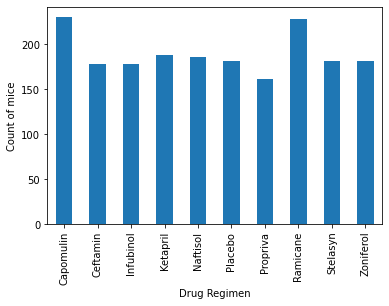

In [62]:
# Generate bar plot that show the total number of timepoints for all mice tested for each drug regimen 
# throughout the course of the study,using Pandas's DataFrame.plot() method.

drug_mice_plot = df.groupby("Drug Regimen").count()["Mouse ID"]
print(drug_mice_plot)
drug_mice_plot.plot(kind="bar",ylabel = "Count of mice")

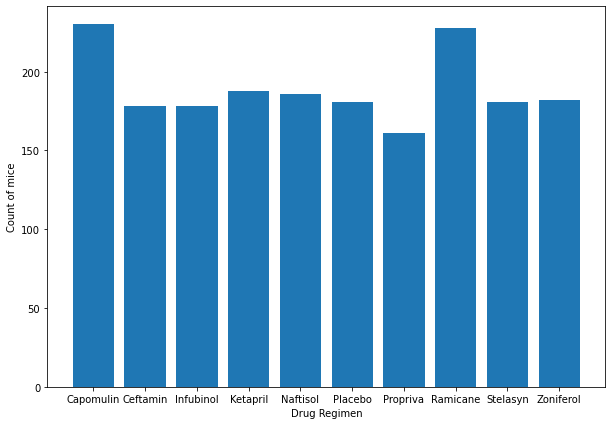

In [63]:
# Generate bar plot that show the total number of timepoints for all mice tested for each drug regimen 
# throughout the course of the study,using Matplotlib's pyplot methods.

plt_1 = plt.figure(figsize=(10,7))
drug_mice_plot1 = pd.DataFrame(df.groupby("Drug Regimen").count()["Mouse ID"])
x = drug_mice_plot1.index
y = drug_mice_plot1.iloc[:,0]
plt.bar(x,y)
plt.xlabel("Drug Regimen")
plt.ylabel("Count of mice")
plt.show()

<AxesSubplot:ylabel='Mouse ID'>

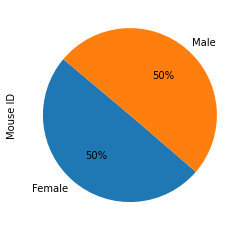

In [64]:
# Generate pie plot that show the distribution of female or male mice in the study,using Pandas's DataFrame.plot().

male_female_mice = df.groupby("Sex").nunique()["Mouse ID"]
male_female_mice.plot(kind="pie",autopct='%1.0f%%',startangle=140)

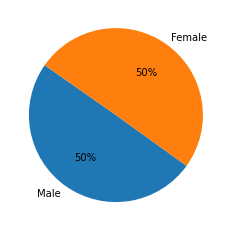

In [65]:
# Generate pie plot that show the distribution of female or male mice in the study,using Matplotlib's pyplot methods.

male_female_mice1 =pd.DataFrame(df.groupby("Sex").nunique()["Mouse ID"])
x = male_female_mice1.iloc[:,0]
y = ["Male","Female"]
plt.pie(x,labels=y,autopct='%1.0f%%',startangle=145)
plt.show()

In [66]:
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse.
# Merge this grouped DataFrame with the original cleaned DataFrame.

greatest_df = df.groupby("Mouse ID").max()["Timepoint"]
new_df = pd.merge(greatest_df,df,on=('Mouse ID','Timepoint'))
new_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [67]:
# Create a list that holds the treatment names, as well as a second, empty list to hold
# the tumor volume data.
treatment_name = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Capomulin_data = []
Ramicane_data = []
Infubinol_data = []
Ceftamin_data = []

In [68]:
# Loop through each drug in the treatment list, locating the rows in the merged
# DataFrame that correspond to each treatment. Append the resulting final tumor
# volumes for each drug to the empty list.

for index in new_df.index:
    if (new_df["Drug Regimen"][index]==treatment_name[0]):
        Capomulin_data.append(new_df["Tumor Volume (mm3)"][index])
        
    elif (new_df["Drug Regimen"][index]==treatment_name[1]):
        Ramicane_data.append(new_df["Tumor Volume (mm3)"][index])
        
    elif (new_df["Drug Regimen"][index]==treatment_name[2]):
        Infubinol_data.append(new_df["Tumor Volume (mm3)"][index])
        
    elif (new_df["Drug Regimen"][index]==treatment_name[3]):
        Ceftamin_data.append(new_df["Tumor Volume (mm3)"][index])

In [82]:
# Determine outliers by using the upper and lower bounds, and then print the results.

volume_df = pd.DataFrame({"Capomulin":Capomulin_data,
                          "Ramicane":Ramicane_data,
                          "Infubinol":Infubinol_data,
                          "Ceftamin":Ceftamin_data,})
upper_bound = volume_df.max()
lower_bound  = volume_df.min()

In [98]:
# calculate the quartiles and IQR and determine if there are any potential outliers across all four treatment regimens.

Capomulin_outlier = []
Ramicane_outlier = []
Infubinol_outlier = []
Ceftamin_outlier = []

Capomulin_quant = np.quantile(Capomulin_data,[.25,.75])
iqr_Capomulin = Capomulin_quant[1] - Capomulin_quant[0]

lower_bound_Capomulin = 32.37735684 - (1.5*7.781863460000004)
upper_bound_Capomulin = 40.1592203 + (1.5*7.781863460000004)

for i in Capomulin_data:
    if i > upper_bound_Capomulin:
        Capomulin_outlier.append(i)
    elif i < lower_bound_Capomulin:
        Capomulin_outlier.append(i)
        
print("IQR of Capomulin:",iqr_Capomulin)
print("Lower bound of Capomulin",lower_bound_Capomulin)
print("upper bound of Capomulin",upper_bound_Capomulin)

IQR of Capomulin: 7.781863460000004
Lower bound of Capomulin 20.70456164999999
upper bound of Capomulin 51.83201549


In [71]:
# calculate the quartiles and IQR and determine if there are any potential outliers across all four treatment 

Ramicane_quant = np.quantile(Ramicane_data,[.25,.75])
iqr_Ramicane = Ramicane_quant[1] - Ramicane_quant[0]
upper_bound_Ramicane = Ramicane_quant[1] + (1.5*iqr_Ramicane)
lower_bound_Ramicane = Ramicane_quant[0] - (1.5*iqr_Ramicane)
for i in Ramicane_data:
    if i > upper_bound_Ramicane:
        Ramicane_outlier.append(i)
    elif i < lower_bound_Ramicane:
        Ramicane_outlier.append(i)
        
print("IQR of Ramicane:",iqr_Ramicane)
print("Lower bound of Ramicane",lower_bound_Ramicane)
print("upper bound of Ramicane",upper_bound_Ramicane)

IQR of Ramicane: 9.098536719999998
Lower bound of Ramicane 17.912664470000003
upper bound of Ramicane 54.30681135


In [72]:
# calculate the quartiles and IQR and determine if there are any potential outliers across all four treatment 

Infubinol_quant = np.quantile(Infubinol_data,[.25,.75])
iqr_Infubinol = Infubinol_quant[1] - Infubinol_quant[0]
upper_bound_Infubinol = Infubinol_quant[1] + (1.5*iqr_Infubinol)
lower_bound_Infubinol = Infubinol_quant[0] - (1.5*iqr_Infubinol)
for i in Infubinol_data:
    if i > upper_bound_Infubinol:
        Infubinol_outlier.append(i)
    elif i < lower_bound_Infubinol:
        Infubinol_outlier.append(i)
        
print("IQR of Infubinol:",iqr_Infubinol)
print("Lower bound of Infubinol",lower_bound_Infubinol)
print("upper bound of Infubinol",upper_bound_Infubinol)

IQR of Infubinol: 11.477135160000003
Lower bound of Infubinol 36.83290494999999
upper bound of Infubinol 82.74144559000001


In [83]:
# calculate the quartiles and IQR and determine if there are any potential outliers across all four treatment 

Ceftamin_quant = np.quantile(Ceftamin_data,[.25,.75])
iqr_Ceftamin = Ceftamin_quant[1] - Ceftamin_quant[0]
upper_bound_Ceftamin = Ceftamin_quant[1] + (1.5*iqr_Ceftamin)
lower_bound_Ceftamin = Ceftamin_quant[0] - (1.5*iqr_Ceftamin)
for i in Ceftamin_data:
    if i > upper_bound_Ceftamin:
        Ceftamin_outlier.append(i)
    elif i < lower_bound_Ceftamin:
        Ceftamin_outlier.append(i)
        
print("IQR of Ceftamin:",iqr_Ceftamin)
print("Lower bound of Ceftamin",lower_bound_Ceftamin)
print("upper bound of Ceftamin",upper_bound_Ceftamin)

IQR of Ceftamin: 15.577752179999997
Lower bound of Ceftamin 25.355449580000002
upper bound of Ceftamin 87.66645829999999


In [84]:
# calculate the quartiles and IQR and determine if there are any potential outliers across all four treatment

print("Capomulin_outlier:",Capomulin_outlier)
print("Ramicane_outlier:",Ramicane_outlier)
print("Infubinol_outlier:",Infubinol_outlier)
print("Ceftamin_outlier:",Ceftamin_outlier)

Capomulin_outlier: []
Ramicane_outlier: []
Infubinol_outlier: []
Ceftamin_outlier: []


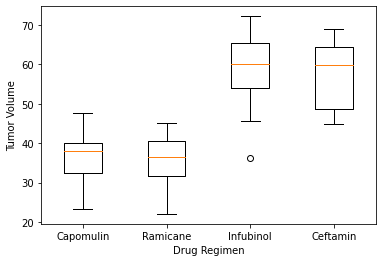

In [75]:
# generate a box plot of the final tumor volume for all four treatment regimens.

data = [volume_df["Capomulin"],volume_df["Ramicane"],volume_df["Infubinol"],volume_df["Ceftamin"]]
plt.boxplot(data)
plt.xticks([1,2,3,4],["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.show()

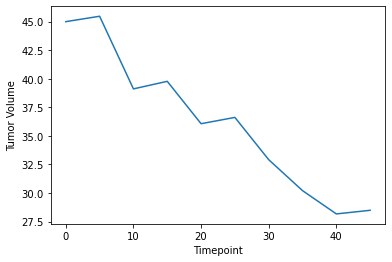

In [76]:
# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs time point for that mouse.

Capomulin_mouse = df.loc[df["Mouse ID"]=="x401"]
x = Capomulin_mouse["Timepoint"]
y = Capomulin_mouse["Tumor Volume (mm3)"]
plt.plot(x,y)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()

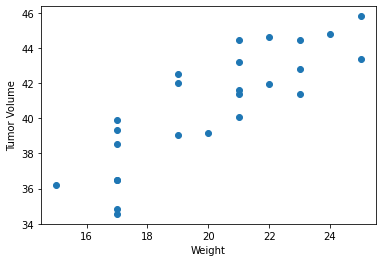

In [77]:
# Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.

Capomulin_treatment = df.loc[df["Drug Regimen"]=="Capomulin"]
average_df = Capomulin_treatment.groupby(['Mouse ID']).mean()
x = average_df["Weight (g)"]
y = average_df["Tumor Volume (mm3)"]
plt.scatter(x,y)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.show()

In [78]:
# Calculate the correlation coefficient and linear regression model between mouse weight and
# average tumor volume for the Capomulin treatment.

x = average_df["Tumor Volume (mm3)"]
y = average_df["Weight (g)"]
print("Corelation Coefficient:",x.corr(y))

print(stats.linregress(x,y))

Corelation Coefficient: 0.8419363424694721
LinregressResult(slope=0.7426941826944182, intercept=-10.14886316411134, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.09924763572688554, intercept_stderr=4.057174696760879)


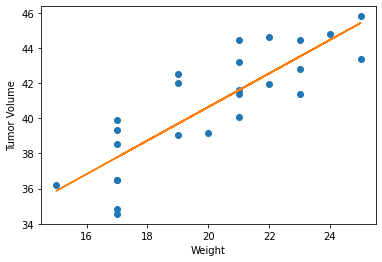

In [79]:
# Plot the linear regression model on top of the previous scatter plot.

x = average_df["Weight (g)"]
y = average_df["Tumor Volume (mm3)"]
plt.plot(x, y, 'o')
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x,slope*x+intercept)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.show()